
# Predict the Success of the Zomato

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [2]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Understading the Data

In [4]:
df.shape

(51717, 17)

In [5]:
df.isnull().any()

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Access the columns which are empty

In [7]:
[i for i in df.columns if df[i].isnull().sum()>1]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

### How many percentage of null values contain by the each null column?

In [8]:
em=[i for i in df.columns if df[i].isnull().sum()>1]
for i in em:
    print('{} have {}  % null values'.format(i,np.round(df[i].isnull().sum()/len(df[i])*100,4)))

rate have 15.0337  % null values
phone have 2.3358  % null values
location have 0.0406  % null values
rest_type have 0.4389  % null values
dish_liked have 54.2916  % null values
cuisines have 0.087  % null values
approx_cost(for two people) have 0.669  % null values


# Cleaning The Data

In [9]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
df['approx_cost(for two people)'].dtypes

dtype('O')

In [11]:
df['approx_cost(for two people)'].unique()
#so we can observe here that the values like '1,500' containing  ',' i.e that are the object type so we need to replace it.

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',',''))
#Convert to string and remove the ','

In [13]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
#Conveted into float

In [14]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [15]:
df.rate.dtypes

dtype('O')

In [16]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df['rate'].isnull().sum()

7775

In [18]:
df['rate'][0].split('/')[0]

'4.1'

In [19]:
def split(x):
    return x.split('/')[0]
    

In [20]:
df['rate']=df['rate'].astype(str).apply(split)

In [21]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [22]:
#Lets remove '-' it
df['rate'].replace('-',0,inplace=True)    #Inplace = True for updating the dataframe otherwise we neeed to reasign it.
df['rate'].replace('NEW',0,inplace=True)

In [23]:
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     nan
51714     nan
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [24]:
df['rate']=df['rate'].astype(float)

In [25]:
df['rate'].dtype

dtype('float64')

# Analysing the categories of the Response.

In [26]:
#Problem Statement: How many types of restaurants we have.


In [27]:
df['rest_type'].unique().shape  
#So 94 types of restaurants we have. 

(94,)

In [28]:
df['rest_type'].value_counts()   
#counted the Restarants frequency

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Food Court, Beverage Shop         2
Cafe, Food Court                  2
Bakery, Food Court                2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

##### Let visualise the Top most Frequent Restaurants.

<AxesSubplot:>

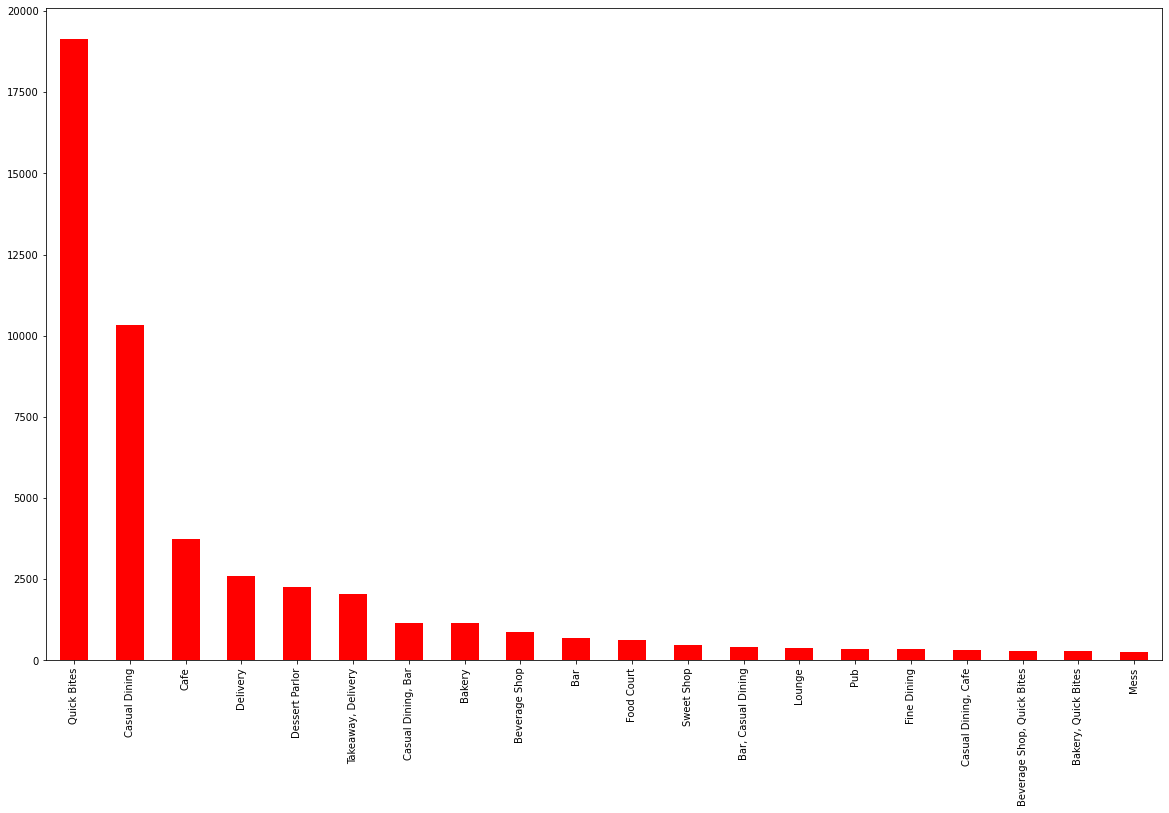

In [29]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')

In [30]:
#let consider top types and and put the reaminigs in other.
def mark(x):
    if x in ('Quick Bites','Casual Dining') : #So here X will work as individual values of the columns.
        return 'Quick Bites+Casual Dining'
    else:
        return 'Others'
    

In [31]:
df['Top types']=df['rest_type'].apply(mark)

In [32]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [33]:
df['Top types'].unique()

array(['Quick Bites+Casual Dining', 'Others'], dtype=object)

In [34]:
value=df['Top types'].value_counts().values

In [35]:
value

array([29462, 22255], dtype=int64)

In [36]:
label=df['Top types'].unique()

In [37]:
label

array(['Quick Bites+Casual Dining', 'Others'], dtype=object)

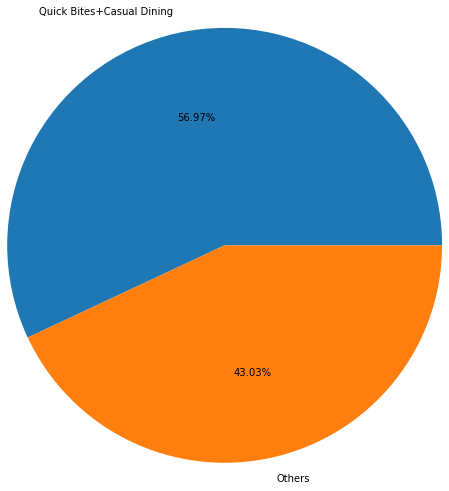

In [38]:

plt.pie(value,labels=label,radius=2.5,autopct='%0.2f%%')
plt.show()


conclusion: Almost 57 % Restaurants Of type 'Quick Bites+Casual Dining'


In [39]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top types                       object
dtype: object

# Perform Restaurant Overview Analysis.

In [40]:
#1. Create  a new Dataframe in which we have votes, cost and rating of each restaurants.

In [41]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types'],
      dtype='object')

In [42]:
rest=df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [43]:
rest.columns=['Name','Total_votes','Total_Restaurants','Average_aprox_Cost','Average_Rating']

In [44]:
rest.head()

,Name,Total_votes,Total_Restaurants,Average_aprox_Cost,Average_Rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [45]:
rest['Votes_per_Restaurants']=rest['Total_votes']/rest['Total_Restaurants']
rest.head()

,Name,Total_votes,Total_Restaurants,Average_aprox_Cost,Average_Rating,Votes_per_Restaurants
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [46]:
popular=rest.sort_values(by='Total_Restaurants',ascending=False);popular

,Name,Total_votes,Total_Restaurants,Average_aprox_Cost,Average_Rating,Votes_per_Restaurants
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [47]:
popular.shape

(8792, 6)

In [48]:
popular.Name.unique().shape

(8792,)

#Average votes recieved by Restaurants.

#Top 5 most voted Restaurants.

#Top 5 Less votes Restaurants.

In [49]:
popular.columns

Index(['Name', 'Total_votes', 'Total_Restaurants', 'Average_aprox_Cost',
       'Average_Rating', 'Votes_per_Restaurants'],
      dtype='object')

Text(0.5, 1.0, 'Top 5 Least Voted Rstraurants')

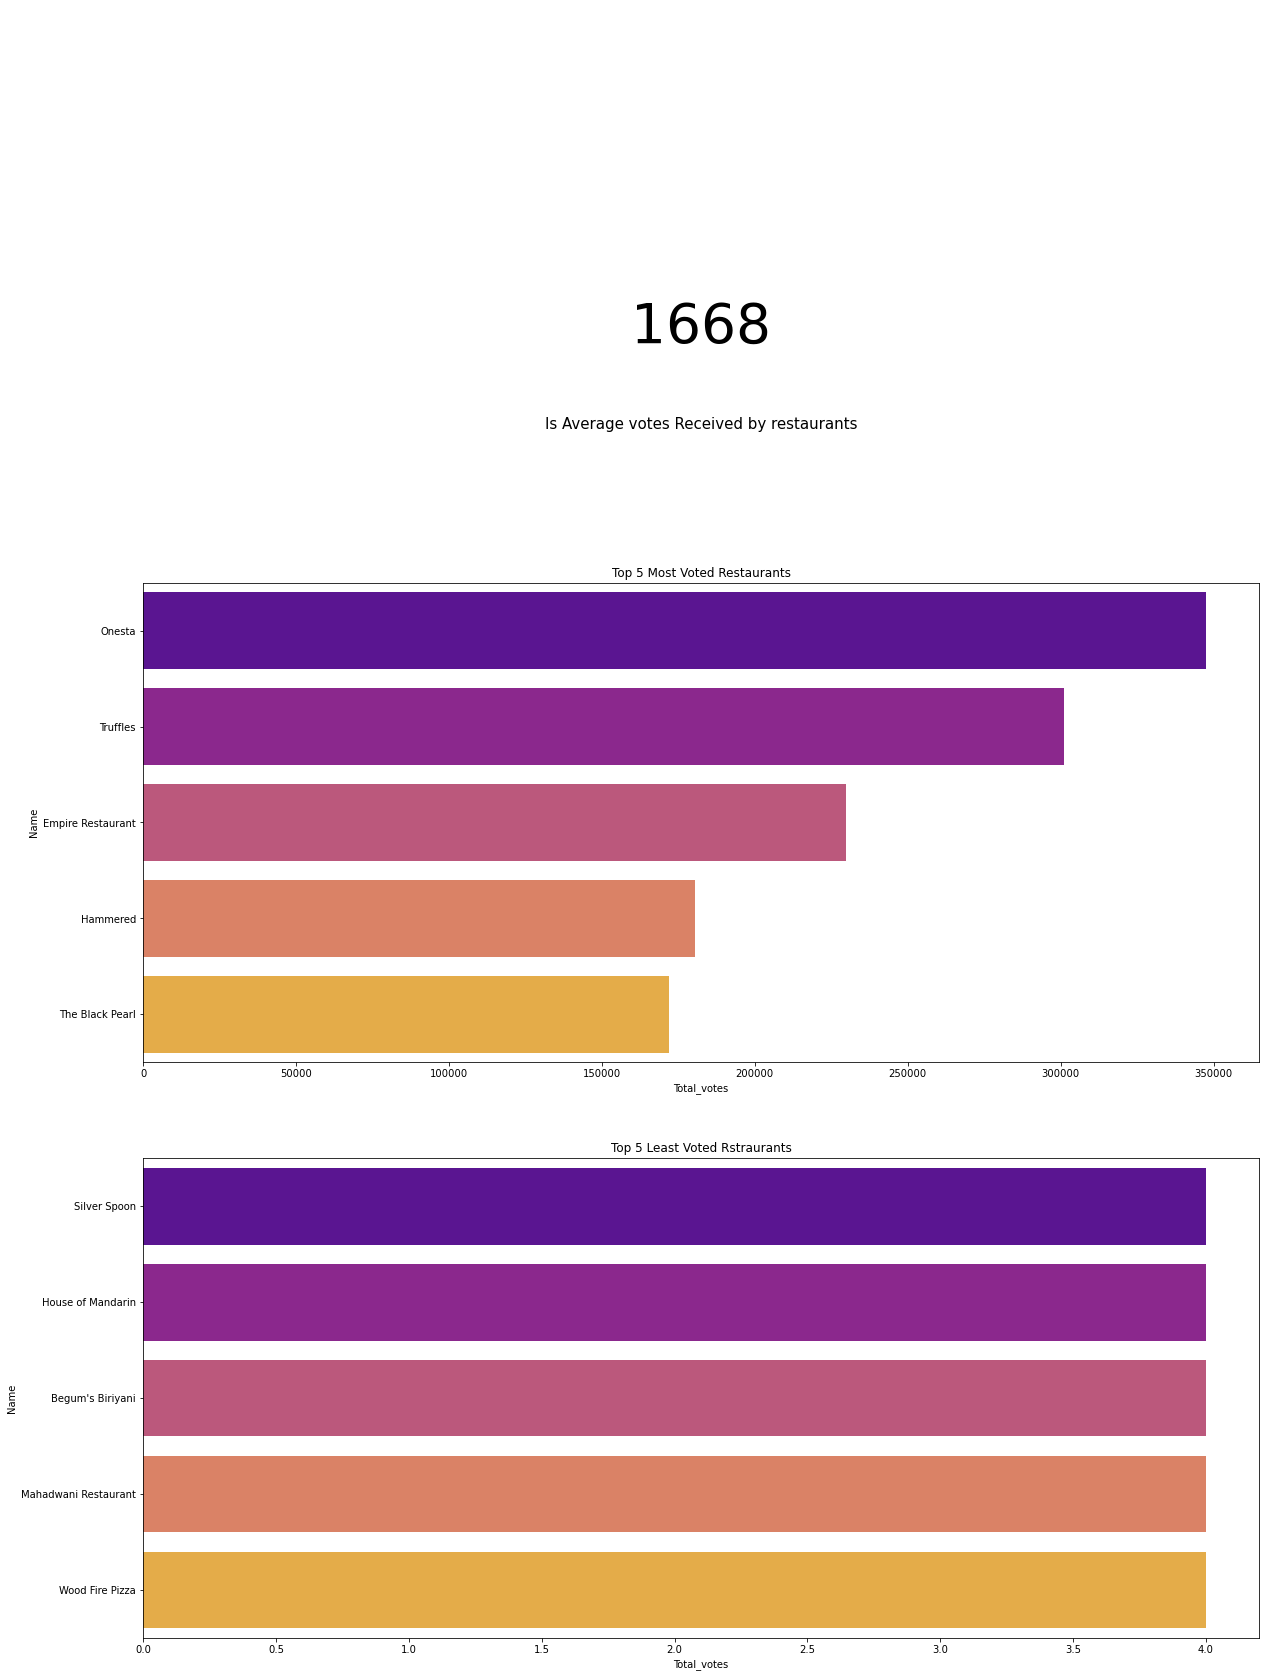

In [50]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50,0.30,int(popular['Total_votes'].mean()),fontsize=55,ha='center')
ax1.text(0.50,0.12,'Is Average votes Received by restaurants',fontsize=15,ha='center')
ax1.axis('off')
sns.barplot(x='Total_votes',y='Name',data=popular.sort_values(by='Total_votes',ascending=False).query('Total_votes>0').head(5),ax=ax2,palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants')
sns.barplot(x='Total_votes',y='Name',data=popular.sort_values(by='Total_votes',ascending=False).query('Total_votes>0').tail(5),ax=ax3,palette='plasma')
ax3.set_title('Top 5 Least Voted Rstraurants')

# Perform In Depth Analysis of Restaurants.

#Most Expensive and cheapest Restaurants  

#how many Restaurants offer Book Table Service? 

How about online Order Service?

#Finding best Budget Restaurants in any Location.


In [51]:
popular.columns

Index(['Name', 'Total_votes', 'Total_Restaurants', 'Average_aprox_Cost',
       'Average_Rating', 'Votes_per_Restaurants'],
      dtype='object')

Text(0.5, 1.0, 'Top 5 Most Cheapest Restaurants in Bengaluru')

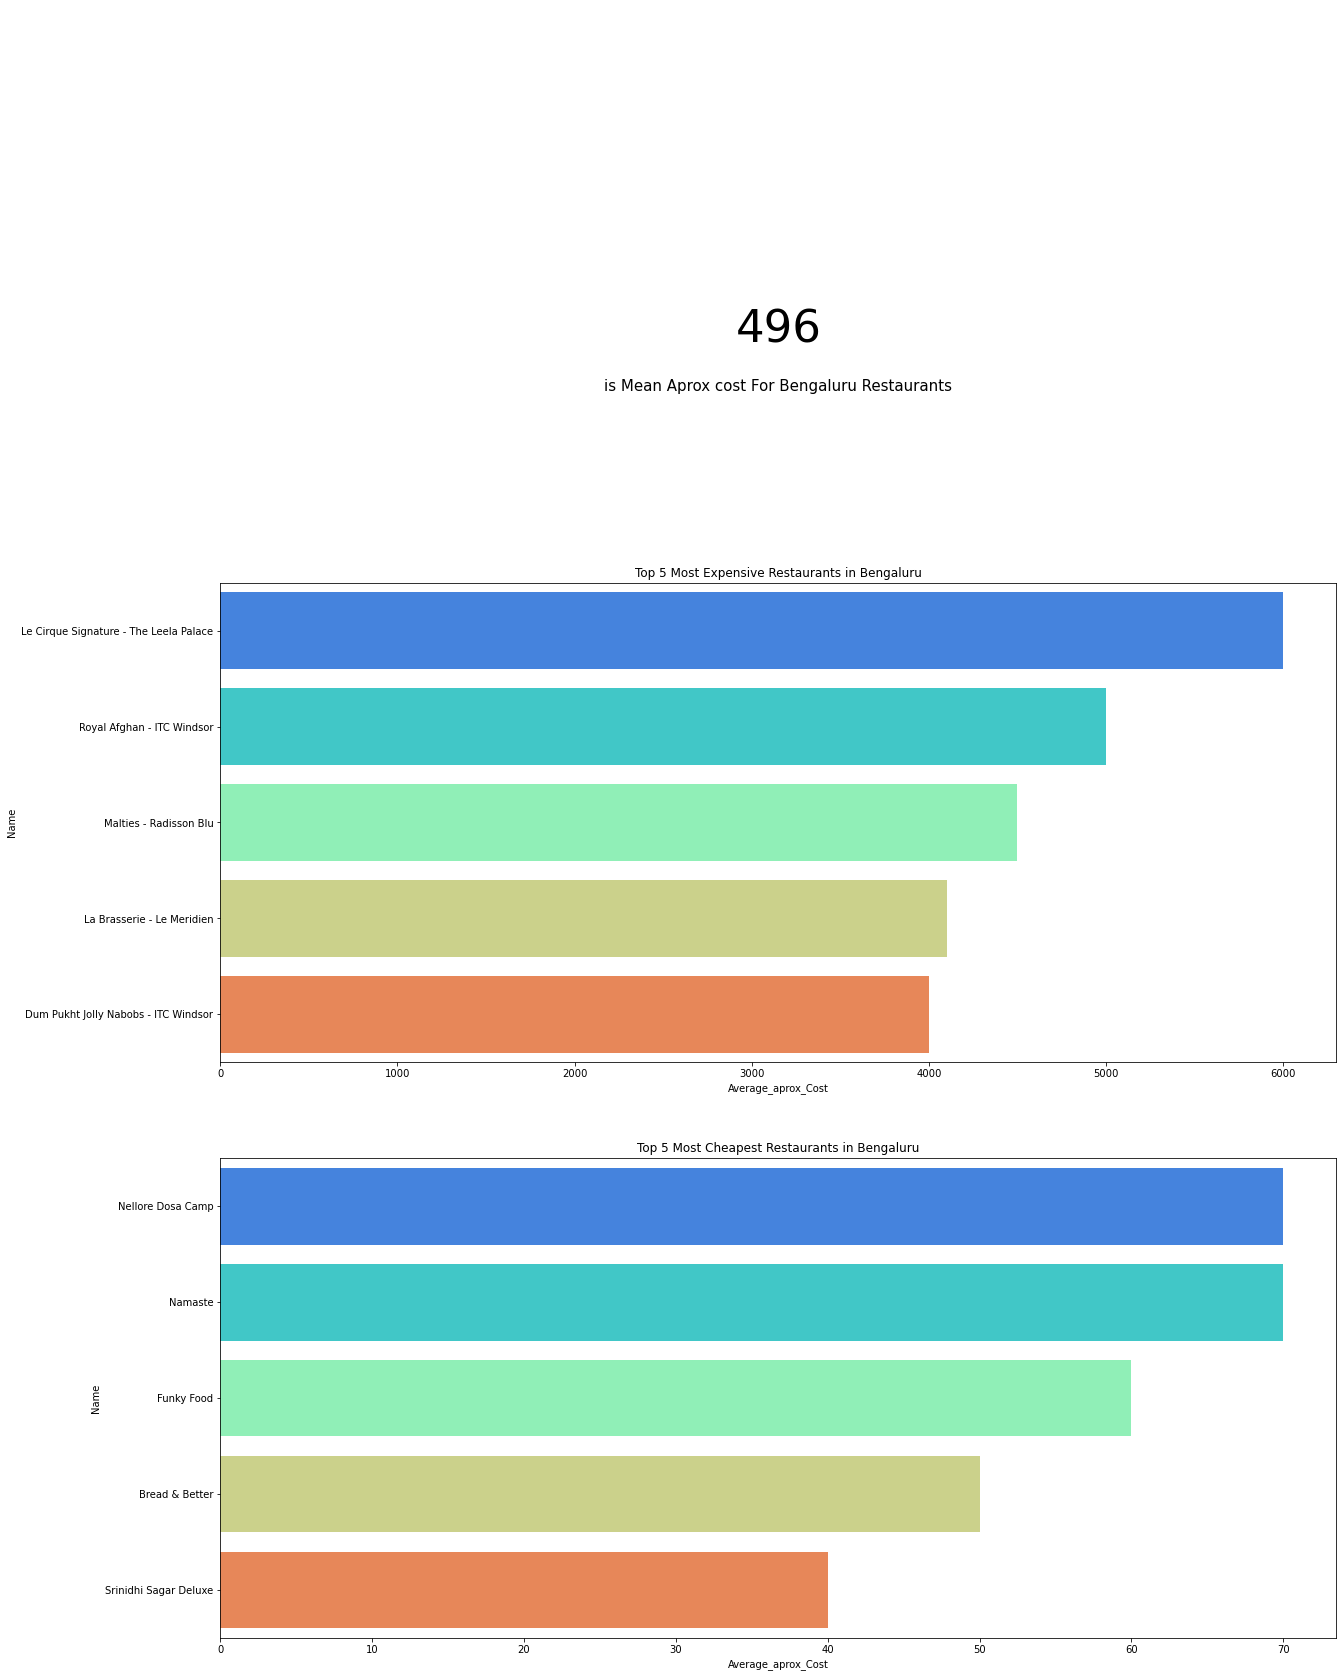

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.5,0.3,int(popular['Average_aprox_Cost'].mean()),fontsize=(45),ha='center')
ax1.text(0.5,0.2,'is Mean Aprox cost For Bengaluru Restaurants',fontsize=15,ha='center')
ax1.axis('off')
sns.barplot(x='Average_aprox_Cost',y='Name',data=popular.sort_values(by='Average_aprox_Cost',ascending=False).query('Average_aprox_Cost>0').head(5),ax=ax2,palette='rainbow')
ax2.set_title("Top 5 Most Expensive Restaurants in Bengaluru")
sns.barplot(x='Average_aprox_Cost',y='Name',data=popular.sort_values(by='Average_aprox_Cost',ascending=False).query('Average_aprox_Cost>0').tail(5),ax=ax3,palette='rainbow')
ax3.set_title('Top 5 Most Cheapest Restaurants in Bengaluru')

#how many Restaurants offer Book Table Service?  

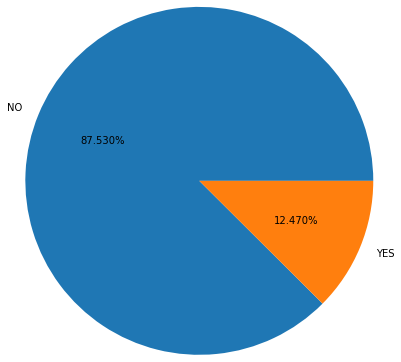

In [53]:
x=df['book_table'].value_counts();x
label=['NO','YES'];label
plt.pie(x,labels=label,autopct='%0.3f%%',radius=2)
plt.show()


 How about online Order Online Service?

In [54]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types'],
      dtype='object')

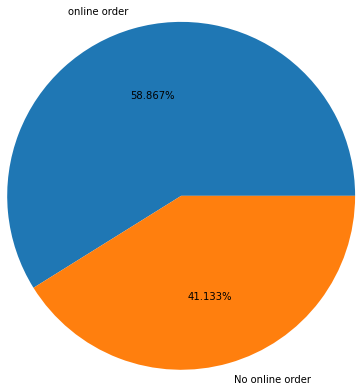

In [55]:
x=df['online_order'].value_counts();x
label=['online order','No online order']
plt.pie(x,labels=label,autopct='%0.3f%%',radius=2)
plt.show()


# Analysing Best budget Restaurants

In [56]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types'],
      dtype='object')

In [57]:
filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget=df[filter].reset_index()
budget.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
0,928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
1,934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
2,940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,Quick Bites+Casual Dining
3,942,https://www.zomato.com/bangalore/roti-wala-btm...,"688, 7th Main, 10th Cross Main Road, 2nd Stage...",Roti Wala,Yes,No,4.0,197,+91 9731100002,BTM,Quick Bites,"Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...",North Indian,300.0,"[('Rated 5.0', 'RATED\n Well, I never had a c...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
4,954,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.1,464,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300.0,"[('Rated 4.0', ""RATED\n It's a great outlet t...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining


In [58]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

__Let create the function which will return the best budget Restaurants for perticular location  and Restaurants type__

In [59]:
def budget_restaurants(location,restaurant_type):
    filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
    budget=df[filter].reset_index()
    return(budget['name'].unique())
    

In [60]:
df['location'].unique()
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [61]:
budget_restaurants('Mysore Road','Casual Dining')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

__How to access the latitudes and longitudes for any place..__

In [62]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types'],
      dtype='object')

# Geographical Analysis


In [63]:
# Make sure you are connected with the Internet connection.

In [64]:
from geopy.geocoders import Nominatim
 
geolocator=Nominatim(user_agent='app')

data=df['name'][0]
data



'Jalsa'

In [65]:
data=geolocator.geocode(data)



GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Jalsa&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A22D0A2700>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
locations=pd.DataFrame({'name':df['location'].unique()});locations

In [ ]:
lat=[]
lon=[]
for location in locations['name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    
    

In [ ]:
locations['latitute']=lat
locations['longitute']=lon

In [ ]:
locations

In [ ]:
rest_location=df['location'].value_counts().reset_index()
rest_location.columns=['name','count'];rest_location


In [ ]:
Restaurant_location=rest_location.merge(locations,on='name').dropna()

In [ ]:
#!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
basemap=folium.Map(location=[12.97,77.59]);basemap

In [ ]:
HeatMap(data=Restaurant_location[['latitute','longitute','count']]).add_to(basemap)

In [ ]:
basemap

# Analysing Customer Behaviour Using WordCloud

1. Analysing Customer Preference.
2. Analysing Reviews of Particular Restaurant.

In [72]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types'],
      dtype='object')

In [73]:
 #!pip install wordcloud

In [74]:
from wordcloud import WordCloud, STOPWORDS

what peoples like in Restaurant type Quick_Bites?


In [75]:
data=df[df['rest_type']=='Quick Bites']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites+Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites+Casual Dining


In [76]:
data['dish_liked'].isnull().sum()

13843

In [77]:
dishesh=''
for word in data['dish_liked'].dropna():
    words=word.split()  #made list
    for i in range(len(words)):
        words[i]=words[i].lower()  #all characters converted in the lower case.
    dishesh =dishesh+' '.join(words)+' ' #join that again.
        

In [78]:
dishesh

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [79]:
stopwords=set(STOPWORDS)


In [80]:
wc=WordCloud(stopwords=stopwords,width=1500,height=1500).generate(dishesh)

(-0.5, 1499.5, 1499.5, -0.5)

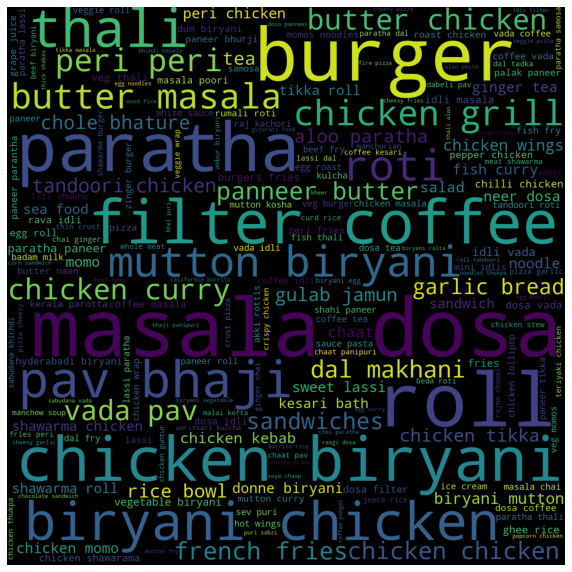

In [81]:
plt.figure(figsize=(10,14))
plt.imshow(wc)
plt.axis('off')

__Conclusion:__

by wordcloud Analysis we can observe the graph as above and can conclude that the dishesh like,
__masala dosa,pav phaji, roti,butter masala, biryani,chicken,chicken grill,peri peri,panneer butter,butter chicken,mutton biryani,coffee__ are most frequent words use while review that is the dishesh are mostly liked by peoples for this restaurants of type Quick Bites.


# Analysing the Review  of perticular Restaurant

In [82]:
data=df['reviews_list'][0] #data looking very unclean 
data


'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [83]:
data=data.lower()

In [84]:
import re   #Regular Expression.

In [85]:
#there are many character in the revies so let remove the characters other than the small and capital alphabetical.

In [86]:
data2=re.sub('[^a-zA-Z]',' ',data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [87]:
#rated repeating multiple times so we need to remove it.

In [88]:
data3=re.sub('rated',' ',data2) ;data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [89]:
#let remove the 'x' character which is repeating multiple times in the data.

In [90]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [91]:
#Let remove the extra Spaces in the data.
data5=re.sub(' +',' ',data4);data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

__lets apply this cleaning process for perticular Restaurant type__

In [92]:
dataset=df[df['rest_type']=='Quick Bites']


In [93]:
dataset.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining


In [94]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower() 
    review=re.sub('[^a-zA-Z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review+str(review)

In [95]:
wc2=WordCloud( stopwords= stopwords,width=1500,height=1500).generate(total_review)                

(-0.5, 1499.5, 1499.5, -0.5)

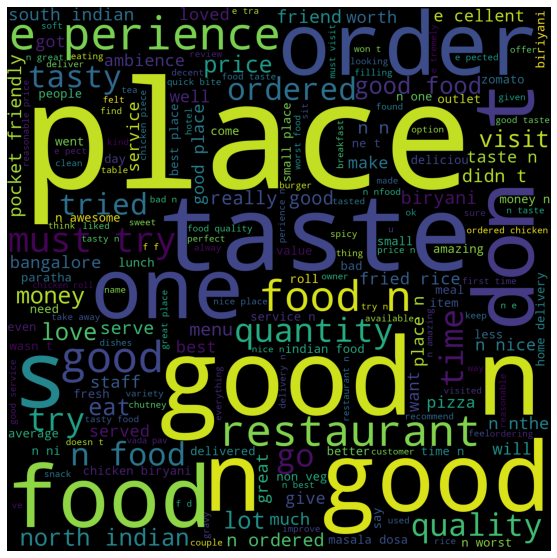

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(wc2)
plt.axis('off')

# Prepare the data for Modelling purpose...

In [97]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [98]:
 df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [99]:
  def assign(x):
        if x>0:
            return 1
        else:
            return 0

In [100]:
df['rated']=df['rate'].apply(assign)


In [101]:
df.rated.unique();x

Yes    30444
No     21273
Name: online_order, dtype: int64

In [102]:
new_restaurants=df[df['rated']==0]
train_val_restaurants=df.query('rated==1')

In [103]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [104]:
#rate < 3.75 bad 
#rate >=3.75 good
import warnings
warnings.filterwarnings('ignore')


In [105]:
threshold=3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)


In [106]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


# Perform Feature Importance on Data

In [107]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types', 'rated', 'target'],
      dtype='object')

In [108]:
train_val_restaurants['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [109]:
def count(x):
    return len(x.split(','))

In [110]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

In [111]:
train_val_restaurants.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types,rated,target,total_cuisines
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1,3


In [112]:
train_val_restaurants['total_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [113]:
train_val_restaurants.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types,rated,target,total_cuisines,total_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1,3,2


In [114]:
train_val_restaurants.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types', 'rated', 'target',
       'total_cuisines', 'total_types'],
      dtype='object')

In [115]:
imp_feature=['online_order', 'book_table',
        'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)','listed_in(city)', 'target',
       'total_cuisines', 'total_types']

In [116]:
data=train_val_restaurants[imp_feature]

In [117]:
data.shape

(41665, 10)

In [118]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,total_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


## Handlling the missing values

In [119]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
total_types                      0
dtype: int64

In [120]:
data.shape

(41665, 10)

In [121]:
data.dropna(how='any',inplace=True)

In [122]:
data.shape

(41271, 10)

In [123]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
total_types                      int64
dtype: object

In [124]:
cat_feature=[col for col in data.columns if data[col].dtype=='O']
num_feature=[col for col in data.columns if data[col].dtype!='O']

In [125]:
for feature in cat_feature:
    print('{} has total {} unique featues'.format(feature,data[feature].nunique()))

online_order has total 2 unique featues
book_table has total 2 unique featues
location has total 92 unique featues
rest_type has total 87 unique featues
listed_in(type) has total 7 unique featues
listed_in(city) has total 30 unique featues


# Perform Feature encoding on data

In [126]:
#Feature Encoding
data[cat_feature]

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51711,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,"ITPL Main Road, Whitefield",Bar,Pubs and bars,Whitefield


In [127]:
data['location'].nunique()

92

In [128]:
values=data['location'].value_counts()/len(data)*100
values
#Percentage of the contribution by the perticular locations.

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

In [129]:
thresh=0.4
#if thresh > 4 then only have to consider the perticular location.

In [130]:
#Locations which contribute more than 0.4 % 
imp=values[values>thresh];imp


BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [131]:
imp.nunique()

45

In [132]:
#So imp dataset contain the 45 values of the values dataset so remaining 47 we need to include as 'other'

In [133]:
np.where(data['location'].isin(imp.index),data['location'],'other')
# if the dataframe 'data' contain the locations of the dataframe 'imp' then take that locations otherwise take the locations 
# as the 'other'.

array(['Banashankari', 'Banashankari', 'Banashankari', ..., 'Whitefield',
       'other', 'other'], dtype=object)

In [134]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

In [135]:
data


,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,total_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,2,2
51711,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,4,2
51712,No,No,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0,1,1
51715,No,Yes,other,Bar,2500.0,Pubs and bars,Whitefield,1,1,1


In [136]:
data['location'].nunique()

47

In [137]:
#by the function
#data['location'].apply(lambda x:'other' if x  not in  imp.index else x)

In [138]:
data['rest_type'].nunique()

87

In [139]:
values2=data['rest_type'].value_counts()/len(data)*100;values2


Quick Bites                  33.643478
Casual Dining                23.299654
Cafe                          8.163117
Dessert Parlor                4.482566
Delivery                      4.048848
                               ...    
Food Court, Beverage Shop     0.004846
Cafe, Food Court              0.004846
Bakery, Food Court            0.004846
Quick Bites, Kiosk            0.002423
Bakery, Beverage Shop         0.002423
Name: rest_type, Length: 87, dtype: float64

In [140]:
thresho=1.5
imp2=values2[values2>thresho]
print(imp2)
print(len(imp2))

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64
10


In [141]:
data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 41271, dtype: object

In [142]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

In [143]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [144]:
data.rest_type.nunique()

11

In [145]:
#data['rest_type']=data['rest_type'].apply(lambda x:'other' if x not in imp2.index else x)

In [146]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,total_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,other,800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [147]:
for feature in cat_feature:
    print('{} has total {} unique features'.format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [148]:
data

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,total_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,other,800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,2,2
51711,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,4,2
51712,No,No,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0,1,1
51715,No,Yes,other,Bar,2500.0,Pubs and bars,Whitefield,1,1,1


# One Hot Encoding

In [149]:
data_cat=data[cat_feature];data_cat

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,other,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51711,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,other,Bar,Pubs and bars,Whitefield


In [150]:
cat_feature

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [151]:
for col in cat_feature:
    col_encoded=pd.get_dummies (data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)

In [152]:
data_cat.shape

(41271, 93)

In [153]:
data_cat.head()

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
data.columns


Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'total_types'],
      dtype='object')

In [155]:
num_feature

['approx_cost(for two people)', 'target', 'total_cuisines', 'total_types']

In [156]:

final_data=pd.concat([data.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'total_types']
],data_cat],axis=1);final_data

,approx_cost(for two people),target,total_cuisines,total_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,800.0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51711,800.0,0,4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51712,1500.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,2500.0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
X=final_data.drop('target',axis=1)

In [158]:
X

,approx_cost(for two people),total_cuisines,total_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,3,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,3,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,3,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,800.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51711,800.0,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51712,1500.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,2500.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [159]:
y=final_data['target']

# Playing with different Models.

# importing libraries

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Importing validation libraries.

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [175]:
models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('NBC',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('XGB',XGBClassifier()))

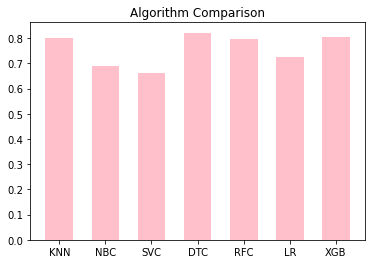

In [176]:
acc=[]
names=[]
for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    names.append(name)
plt.bar(names,acc,color="pink",width=0.6)
plt.title("Algorithm Comparison")
plt.show()
    
    
     

# Applying Random Forest Algorithm on dataset

## Testing and Trainnig

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [179]:
X_train.shape


(33016, 96)

In [180]:
X_test.shape


(8255, 96)

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
model=RandomForestClassifier()

In [183]:
model.fit(X_train,y_train)


RandomForestClassifier()

In [184]:
y_pred=model.predict(X_test)

# Validation

In [185]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [186]:
print("Accuracy of the Model",accuracy_score(y_test,y_pred))

Accuracy of the Model 0.7958812840702605
